# Data-X Spring 2018: Homework 02

### Regression, Classification, Webscraping

**Authors:** Sana Iqbal (Part 1, 2, 3), Alexander Fred-Ojala (Extra Credit)


In this homework, you will do some exercises with prediction-classification, regression and web-scraping.


## Part 1


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1:Read the data file in python. Describe data features in terms of type, distribution range and mean values. Plot feature distributions.This step should give you clues about data sufficiency.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read csv into dataframe
df = pd.read_csv('Energy.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [3]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object

In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [5]:
range = df.max() - df.min()
print("The range spanned by each column is: ")
print(range)
print('\n')
print("The mean of each column is: ")
print(df.mean())

The range spanned by each column is: 
X1      0.36
X2    294.00
X3    171.50
X4    110.25
X5      3.50
X6      3.00
X7      0.40
X8      5.00
Y1     37.09
dtype: float64


The mean of each column is: 
X1      0.764167
X2    671.708333
X3    318.500000
X4    176.604167
X5      5.250000
X6      3.500000
X7      0.234375
X8      2.812500
Y1     22.307201
dtype: float64


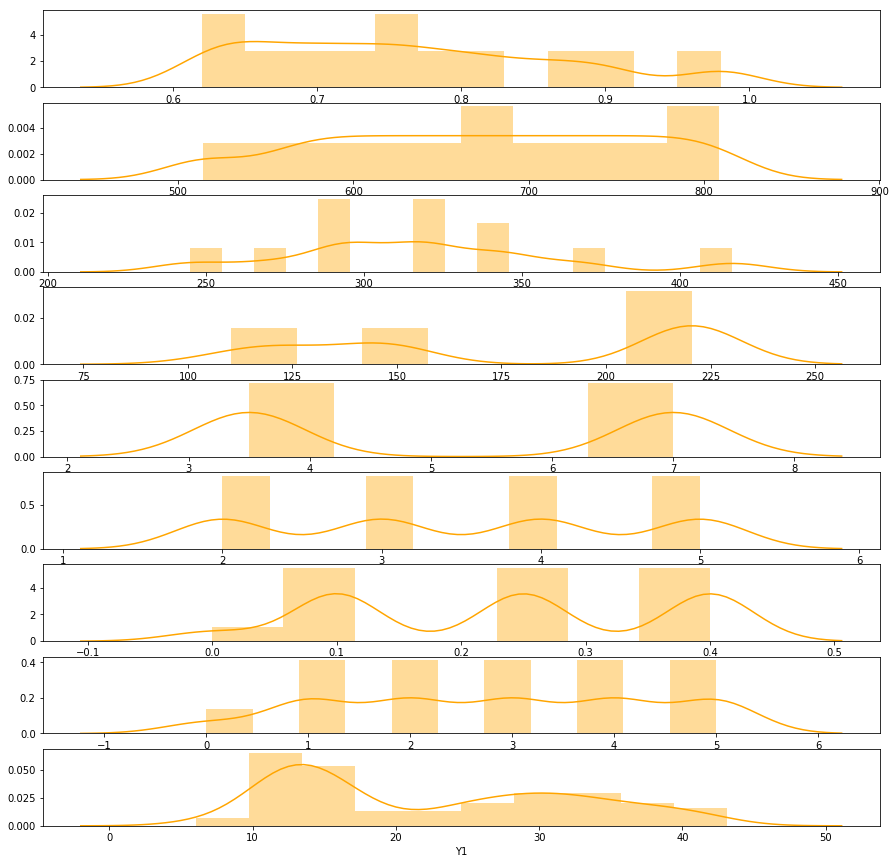

In [6]:
# plot feature distributions
f, ax = plt.subplots(9,figsize=(15,15))

counter = 0
for column in df.columns:
    sns.distplot(df[column],color='orange', ax=ax[counter])
    counter += 1

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q2.1: Train a linear regression model on 85 percent of the given dataset, what is the intercept value and coefficient values.__



In [7]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [7]:
# set X (training) and Y (target)
X = df.iloc[:,:-1]
Y = df['Y1']

X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

Number of samples in training data: 652
Number of samples in validation data: 116


In [9]:
from sklearn import linear_model

LinearRegressionModel = linear_model.LinearRegression()
LinearRegressionModel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('Coefficients: ', LinearRegressionModel.coef_, '\n')
print('Intercept: ', LinearRegressionModel.intercept_)

Coefficients:  [-6.08116144e+01 -1.93865769e+11  1.93865769e+11  3.87731538e+11
  4.33557677e+00  1.84455775e-02  2.00677064e+01  2.35011583e-01] 

Intercept:  75.57138995398773



#### Q.2.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 15 percent of unseen data (test error) __ 



In [11]:
training_accuracy = LinearRegressionModel.score(x_train, y_train)
print('Training accuracy: ', training_accuracy)

validation_accuracy = LinearRegressionModel.score(x_test, y_test)
print('Accuracy of the model on unseen validation data: ', validation_accuracy)

Training accuracy:  0.9169102239683802
Accuracy of the model on unseen validation data:  0.9104340399531479


In [12]:
train_pred = LinearRegressionModel.predict(x_train)
test_pred = LinearRegressionModel.predict(x_test)

train_error = np.sqrt(np.mean((train_pred - y_train)**2))
test_error = np.sqrt(np.mean((test_pred - y_test)**2))

print('Training MSE: ', train_error)
print('Test MSE: ', test_error)

Training MSE:  2.9298499350562706
Test MSE:  2.8776063769610216



__ Q2.3: Lets us see the effect of amount of data on the performance of prediction model.Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data   is the same as above for  all  these cases.__  

Plot error rates vs number of training examples.Comment on the relationshipyou observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

In [39]:
np.random.seed(1996)
r = np.array([100, 200, 300, 400, 500, 652])
tS = [.869, .739, .609, .479, .349, .151]
tA = np.array([])
vA = np.array([])
tMSE = np.array([])
vMSE = np.array([])

for i in tS:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=float(i), random_state=100)
    print ('Number of samples in training data:',len(x_train))
    print ('Number of samples in validation data:',len(x_test))

    LinearRegressionModel = linear_model.LinearRegression()
    LinearRegressionModel.fit(x_train, y_train)
    
    train_pred = LinearRegressionModel.predict(x_train)
    train_error = np.sqrt(np.mean((train_pred - y_train)**2))
    training_accuracy = LinearRegressionModel.score(x_train, y_train)
    print('Training accuracy: ', training_accuracy)
    tA = np.append(tA, training_accuracy)
    tMSE = np.append(tMSE, train_error)
    print('Training MSE: ', train_error)
    
    y_pred = LinearRegressionModel.predict(x_test)

    test_error = np.sqrt(np.mean((y_pred - y_test)**2))
    validation_accuracy = LinearRegressionModel.score(x_test, y_test)
    print('Accuracy of the model on unseen validation data: ', validation_accuracy, '\n')
    vMSE = np.append(vMSE, test_error)
    print('Test MSE: ', test_error)
    
    vA = np.append(vA, validation_accuracy)

Number of samples in training data: 100
Number of samples in validation data: 668
Training accuracy:  0.9331810075948953
Training MSE:  2.5944176057928696
Accuracy of the model on unseen validation data:  0.907830774519648 

Test MSE:  3.060614280411467
Number of samples in training data: 200
Number of samples in validation data: 568
Training accuracy:  0.925122714253814
Training MSE:  2.7389481462997916
Accuracy of the model on unseen validation data:  0.9109575726847151 

Test MSE:  3.013902303275895
Number of samples in training data: 300
Number of samples in validation data: 468
Training accuracy:  0.9209511997025716
Training MSE:  2.8605367823942247
Accuracy of the model on unseen validation data:  0.9118509953139047 

Test MSE:  2.9762765026124702
Number of samples in training data: 400
Number of samples in validation data: 368
Training accuracy:  0.9180304429206391
Training MSE:  2.9099778302103836
Accuracy of the model on unseen validation data:  0.9136503547492788 

Test MSE: 

In [40]:
r = r.reshape(6,1)
tA = tA.reshape(6,1)
vA = vA.reshape(6,1)

In [41]:
tE = 1 - tA
vE = 1 - vA
np.hstack((r, tE, vE))

array([[1.00000000e+02, 6.68189924e-02, 9.21692255e-02],
       [2.00000000e+02, 7.48772857e-02, 8.90424273e-02],
       [3.00000000e+02, 7.90488003e-02, 8.81490047e-02],
       [4.00000000e+02, 8.19695571e-02, 8.63496453e-02],
       [5.00000000e+02, 8.39138953e-02, 8.51723895e-02],
       [6.52000000e+02, 8.30897760e-02, 8.95659600e-02]])

Text(0,0.5,'Error')

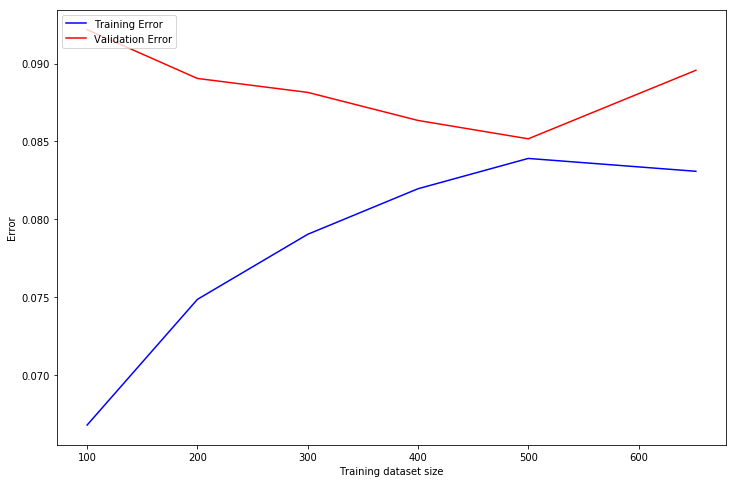

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(r, tE, 'b', label='Training Error')
ax.plot(r, vE, 'r', label='Validation Error')
ax.legend(loc=2)
ax.set_xlabel('Training dataset size')
ax.set_ylabel('Error')

Text(0,0.5,'MSE')

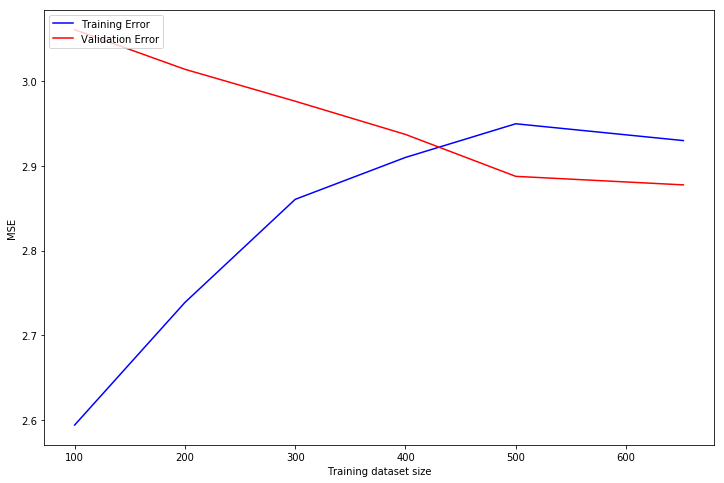

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(r, tMSE, 'b', label='Training Error')
ax.plot(r, vMSE, 'r', label='Validation Error')
ax.legend(loc=2)
ax.set_xlabel('Training dataset size')
ax.set_ylabel('MSE')

In [ ]:
# As the size of the training dataset increases, training error increases and validation
# error decreases


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 3.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 15),   
1: 'Medium'  (15-30),   
2: 'High'  (>30)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.15.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [18]:
Y = df['Y1']
filterVals = [0, 15, 30, Y.max()]
Y1 = pd.cut(Y, bins=filterVals, labels=[0,1,2])

In [19]:
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, Y1, test_size=.15, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

LogisticRegressionModel = linear_model.LogisticRegression()
LogisticRegressionModel.fit(x_train, y_train)

training_accuracy = LogisticRegressionModel.score(x_train, y_train)
print('Training accuracy: ', training_accuracy)
# confusion matrix for training doesn't really show anything significant

y_pred = LogisticRegressionModel.predict(x_test)

validation_accuracy = LogisticRegressionModel.score(x_test, y_test)
print('Accuracy of the model on unseen validation data: ', validation_accuracy, '\n')

confusion_matrix(y_test,y_pred)

Number of samples in training data: 652
Number of samples in validation data: 116
(652, 8) (652,)
(116, 8) (116,)
Training accuracy:  0.7730061349693251
Accuracy of the model on unseen validation data:  0.7672413793103449 



array([[40,  0,  0],
       [12, 29,  9],
       [ 0,  6, 20]])

__ Q3.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization.If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [20]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [21]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
print(mmscaler.fit(df))
df2 = mmscaler.transform(df)
df2 = pd.DataFrame(df2)
df2.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1',]
df2['Y1'] = Y1
df2.head()

MinMaxScaler(copy=True, feature_range=(0, 1))


,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,1
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,1
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,1
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,1
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,1


In [22]:
X = df2.iloc[:,:-1]
Y = df2['Y1']
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Number of samples in training data: 652
Number of samples in validation data: 116
(652, 8) (652,)
(116, 8) (116,)


In [24]:
LogisticRegressionModel = linear_model.LogisticRegression()
LogisticRegressionModel.fit(x_train, y_train)

training_accuracy = LogisticRegressionModel.score(x_train, y_train)
print('Training accuracy: ', training_accuracy)

y_pred = LogisticRegressionModel.predict(x_test)

validation_accuracy = LogisticRegressionModel.score(x_test, y_test)
print('Accuracy of the model on unseen validation data: ', validation_accuracy, '\n')

Training accuracy:  0.799079754601227
Accuracy of the model on unseen validation data:  0.7844827586206896 



In [ ]:
# Model accuracy increased after using the min-max preprocessing tool across the features

## Part 2



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. Analyze the data features, check for NaN values. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 

__ 2. Preprocess data to replace NaN values in a feature(if any) using mean of the feature.  
Train  logistic regression, SVM, perceptron, kNN, xgboost and random forest models using this preprocessed data with 20% test split.Report training and test accuracies.__







In [49]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

pd.set_option('display.max_columns', 100) # Print 100 Pandas columns

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

In [50]:
# read csv into dataframe
diabetes = pd.read_csv('diabetesdata.csv')
diabetes.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,72,0,33.6,0.627,50.0,1
1,1,NaN,66,0,26.6,0.351,31.0,0
2,8,183.0,64,0,23.3,0.672,NaN,1
3,1,NaN,66,94,28.1,0.167,21.0,0
4,0,137.0,40,168,43.1,2.288,33.0,1


In [51]:
print("Number of NAN values before: ", '\n', diabetes.isnull().sum())
diabetes['glucoseLevel'] = diabetes['glucoseLevel'].fillna(diabetes['glucoseLevel'].mean())
diabetes['Age'] = diabetes['Age'].fillna(diabetes['Age'].mean())

Number of NAN values before:  
 TimesPregnant     0
glucoseLevel     34
BP                0
insulin           0
BMI               0
Pedigree          0
Age              33
IsDiabetic        0
dtype: int64


In [52]:
print("Number of NAN values after: ", '\n', diabetes.isnull().sum())

Number of NAN values after:  
 TimesPregnant    0
glucoseLevel     0
BP               0
insulin          0
BMI              0
Pedigree         0
Age              0
IsDiabetic       0
dtype: int64


In [53]:
X = diabetes.iloc[:,:-1]
Y = diabetes['IsDiabetic']
print(X.shape)
print(Y.shape)

(768, 7)
(768,)


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Number of samples in training data: 614
Number of samples in validation data: 154
(614, 7) (614,)
(154, 7) (154,)


In [55]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train) 
training_accuracy = logReg.score(x_train, y_train)
print('Training accuracy: ', str(round(training_accuracy,2)))
y_pred = logReg.predict(x_test)
accLog = logReg.score(x_test, y_test)
print('Logistic Regression accuracy:', str(round(accLog,2)))

Training accuracy:  0.79
Logistic Regression accuracy: 0.73


In [56]:
svc = SVC()
svc.fit(x_train, y_train)
training_accuracy = svc.score(x_train, y_train)
print('Training accuracy: ', str(round(training_accuracy,2)))
y_pred = svc.predict(x_test)
accSvc = svc.score(x_test, y_test)
print('SVC accuracy:', str(round(accSvc,2)))

Training accuracy:  1.0
SVC accuracy: 0.66


In [57]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
training_accuracy = perceptron.score(x_train, y_train)
print('Training accuracy: ', str(round(training_accuracy,2)))
y_pred = perceptron.predict(x_test)
accPerceptron = perceptron.score(x_test, y_test)
print('Perceptron accuracy:', str(round(accPerceptron,2)))

Training accuracy:  0.64
Perceptron accuracy: 0.64


In [58]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
training_accuracy = knn.score(x_train, y_train)
print('Training accuracy: ', str(round(training_accuracy,2)))
y_pred = knn.predict(x_test)
accKnn = knn.score(x_test, y_test)
print('KNN accuracy:', str(round(accKnn,2)))

Training accuracy:  0.83
KNN accuracy: 0.73


In [59]:
gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(x_train, y_train)
training_accuracy = gradboost.score(x_train, y_train)
print('Training accuracy: ', str(round(training_accuracy,2)))
y_pred = gradboost.predict(x_test)
accGradboost = gradboost.score(x_test, y_test)
print('XGBoost accuracy:', str(round(accGradboost,2)))

Training accuracy:  1.0
XGBoost accuracy: 0.72


In [60]:
randomForest = RandomForestClassifier(n_estimators=1000)
randomForest.fit(x_train, y_train)
training_accuracy = randomForest.score(x_train, y_train)
print('Training accuracy: ', str(round(training_accuracy,2)))
y_pred = randomForest.predict(x_test)
accRandomForest = randomForest.score(x_test, y_test)
print('Random Forest accuracy:', str(round(accRandomForest,2)))

Training accuracy:  1.0
Random Forest accuracy: 0.69




__3. What is the  ratio of diabetic persons in 3 equirange bands of 'BMI' and 'Pedigree' in the provided dataset.__

 __Convert these features - 'BP','insulin','BMI' and 'Pedigree'   into categorical values by mapping different bands of values of these features to integers 0,1,2.__  
 
HINT: USE pd.cut with bin=3 to create 3 bins






In [61]:
bp = pd.cut(diabetes['BP'], 3, labels=[0,1,2])
insulin = pd.cut(diabetes['insulin'], 3, labels=[0,1,2])
bmi = pd.cut(diabetes['BMI'], 3, labels=[0,1,2])
pedigree = pd.cut(diabetes['Pedigree'], 3, labels=[0,1,2])

counterBp0 = 0
counterBp1 = 0
counterBp2 = 0
counterPed0 = 0
counterPed1 = 0
counterPed2 = 0

for i in range(0, len(bmi)):
    if (bmi[i] == 0) & (diabetes['IsDiabetic'][i] == 1):
        counterBp0 += 1
    if (bmi[i] == 1) & (diabetes['IsDiabetic'][i] == 1):
        counterBp1 += 1
    if (bmi[i] == 2) & (diabetes['IsDiabetic'][i] == 1):
        counterBp2 += 1

for i in range(0, len(pedigree)):
    if (pedigree[i] == 0) & (diabetes['IsDiabetic'][i] == 1):
        counterPed0 += 1
    if (pedigree[i] == 1) & (diabetes['IsDiabetic'][i] == 1):
        counterPed1 += 1
    if (pedigree[i] == 2) & (diabetes['IsDiabetic'][i] == 1):
        counterPed2 += 1
        
print('BMI band 0 = ', counterBp0/pd.value_counts(bmi)[0])
print('BMI band 1 = ', counterBp1/pd.value_counts(bmi)[1])
print('BMI band 2 = ', counterBp2/pd.value_counts(bmi)[2])

print('Pedigree band 0 = ', counterPed0/pd.value_counts(pedigree)[0])
print('Pedigree band 1 = ', counterPed1/pd.value_counts(pedigree)[1])
print('Pedigree band 2 = ', counterPed2/pd.value_counts(pedigree)[2])

BMI band 0 =  0.0392156862745098
BMI band 1 =  0.35829662261380324
BMI band 2 =  0.6111111111111112
Pedigree band 0 =  0.327007299270073
Pedigree band 1 =  0.5405405405405406
Pedigree band 2 =  0.4444444444444444



__4. Now consider the original dataset again, instead of generalizing the NAN values with the mean of the feature we will try assigning values to NANs based on some hypothesis. For example for age we assume that the relation between BMI and BP of people is a reflection of the age group.We can have 9 types of BMI and BP relations and our aim is to find the median age of each of that group:__

Your Age guess matrix will look like this:  

| BMI | 0       | 1      | 2  |
|-----|-------------|------------- |----- |
| BP  |             |              |      |
| 0   | a00         | a01          | a02  |
| 1   | a10         | a11          | a12  |
| 2   | a20         | a21          |  a22 |


__Create a guess_matrix  for NaN values of *'Age'* ( using 'BMI' and 'BP')  and  *'glucoseLevel'*  (using 'BP' and 'Pedigree') for the given dataset and assign values accordingly to the NaNs in 'Age' or *'glucoseLevel'* .__


Refer to how we guessed age in the titanic notebook in the class.



In [68]:
diabetes = pd.read_csv('diabetesdata.csv')
diabetes.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,72,0,33.6,0.627,50.0,1
1,1,NaN,66,0,26.6,0.351,31.0,0
2,8,183.0,64,0,23.3,0.672,NaN,1
3,1,NaN,66,94,28.1,0.167,21.0,0
4,0,137.0,40,168,43.1,2.288,33.0,1


In [72]:
guessAge = np.zeros([3,3])
guessGlucose = np.zeros([3,3])

for i in range(3):
    for j in range(3):
        guess = diabetes[(bp == i) & (bmi == j)]['Age']
        age = guess.median()
        guessAge[i,j] = int(age)
        
for i in range(3):
    for j in range(3):
        guess = diabetes[(bp == i) & (pedigree == j)]['glucoseLevel']
        glucose = guess.median()
        guessGlucose[i,j] = int(glucose)
        
print('Age guess matrix: \n', guessAge)
print('Glucose guess matrix: \n', guessGlucose)

Age guess matrix: 
 [[24. 29. 33.]
 [25. 29. 32.]
 [55. 37. 31.]]
Glucose guess matrix: 
 [[115. 127. 137.]
 [112. 115. 149.]
 [133. 129. 159.]]




__5. Now, convert 'glucoseLevel' and 'Age' features also to categorical variables of 5 categories each.__

__Use this dataset (with all features in categorical form) to train perceptron, logistic regression and random forest models using 20% test split. Report training and test accuracies.__







In [73]:
diabetes['BP band'] = bp
diabetes['Insulin band'] = insulin
diabetes['BMI band'] = bmi
diabetes['Pedigree band'] = pedigree

del diabetes['BP']
del diabetes['insulin']
del diabetes['BMI']
del diabetes['Pedigree']

diabetes.head()

,TimesPregnant,glucoseLevel,Age,IsDiabetic,BP band,Insulin band,BMI band,Pedigree band
0,6,148.0,50.0,1,1,0,1,0
1,1,NaN,31.0,0,1,0,1,0
2,8,183.0,NaN,1,1,0,1,0
3,1,NaN,21.0,0,1,0,1,0
4,0,137.0,33.0,1,0,0,1,2


In [77]:
for i in range(3):
    for j in range(3):
        diabetes.loc[ (diabetes['Age'].isnull()) & (diabetes['BP band'] == i) \
                     & (diabetes['BMI band'] == j), 'Age'] = guessAge[i,j]

for i in range(3):
    for j in range(3):
         diabetes.loc[(diabetes['glucoseLevel'].isnull()) & (diabetes['BP band'] == i) \
                      & (diabetes['Pedigree band'] == j),'glucoseLevel'] = guessGlucose[i,j]

In [78]:
diabetes.head()

,TimesPregnant,glucoseLevel,Age,IsDiabetic,BP band,Insulin band,BMI band,Pedigree band
0,6,148.0,50.0,1,1,0,1,0
1,1,112.0,31.0,0,1,0,1,0
2,8,183.0,29.0,1,1,0,1,0
3,1,112.0,21.0,0,1,0,1,0
4,0,137.0,33.0,1,0,0,1,2


In [79]:
glucose = pd.cut(diabetes['glucoseLevel'], 5, labels=[0,1,2,3,4])
diabetes['Glucose band'] = glucose
del diabetes['glucoseLevel']

age = pd.cut(diabetes['Age'], 5, labels=[0,1,2,3,4])
diabetes['Age band'] = age
del diabetes['Age']

In [80]:
diabetes.head()

,TimesPregnant,IsDiabetic,BP band,Insulin band,BMI band,Pedigree band,Glucose band,Age band
0,6,1,1,0,1,0,3,2
1,1,0,1,0,1,0,2,0
2,8,1,1,0,1,0,4,0
3,1,0,1,0,1,0,2,0
4,0,1,0,0,1,2,3,0


In [86]:
diabetes = diabetes[['TimesPregnant', 'BP band', 'Insulin band', 'BMI band', 'Pedigree band', 'Glucose band', 'Age band', 'IsDiabetic']]

In [87]:
diabetes.head()

,TimesPregnant,BP band,Insulin band,BMI band,Pedigree band,Glucose band,Age band,IsDiabetic
0,6,1,0,1,0,3,2,1
1,1,1,0,1,0,2,0,0
2,8,1,0,1,0,4,0,1
3,1,1,0,1,0,2,0,0
4,0,0,0,1,2,3,0,1


In [88]:
X = diabetes.iloc[:,:-1]
Y = diabetes['IsDiabetic']
print(X.shape)
print(Y.shape)

(768, 7)
(768,)


In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Number of samples in training data: 614
Number of samples in validation data: 154
(614, 7) (614,)
(154, 7) (154,)


In [90]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
training_accuracy = perceptron.score(x_train, y_train)
print('Training accuracy: ', str(round(training_accuracy,2)))
y_pred = perceptron.predict(x_test)
accPerceptron = perceptron.score(x_test, y_test)
print('Perceptron accuracy:', str(round(accPerceptron,2)))

Training accuracy:  0.71
Perceptron accuracy: 0.7


In [91]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train) 
training_accuracy = logReg.score(x_train, y_train)
print('Training accuracy: ', str(round(training_accuracy,2)))
y_pred = logReg.predict(x_test)
accLog = logReg.score(x_test, y_test)
print('Logistic Regression accuracy:', str(round(accLog,2)))

Training accuracy:  0.77
Logistic Regression accuracy: 0.71


In [95]:
randomForest = RandomForestClassifier(n_estimators=1000)
randomForest.fit(x_train, y_train)
training_accuracy = randomForest.score(x_train, y_train)
print('Training accuracy: ', str(round(training_accuracy,2)))
y_pred = randomForest.predict(x_test)
accRandomForest = randomForest.score(x_test, y_test)
print('Random Forest accuracy:', str(round(accRandomForest,2)))

Training accuracy:  0.9
Random Forest accuracy: 0.64


### Part 3

1. __Derive the expression for the optimal parameters in the linear regression equation, i.e. solve the normal equation for Ordinary Least Squares for the case of Simple Linear Regression, when we only have one input and one output__

Given a set of _n_ points $(X_i,Y_i)$ where $Yi$ is dependent on $Xi$ by a linear relation,  find the best-fit line,$$Z_i = {aX_i + b}$$  that minimizes the __sum of squared errors in Y__,i.e: $$minimize \sum_{i}{(Y_i- Z_i)^2}$$
__i. __ Show that $$ intercept \quad b = \overline{Y}-  a.\overline{X}\quad  and   \quad slope \quad a= \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})}{ \sum_{i}(X_i- \overline{X})^2}$$


 where $\overline{X}$ and  $\overline{Y}$ are the averages of the X values and the Y values, respectively.
 
__ ii. __Show that slope _a_ can be written as $ a = r.(S_y /S_x)$ where $S_y$  = the standard deviation of the Y values and $S_x$= the standard deviation of the X values and _r_ is the correlation coefficient.

##### Please try to write a nice LateXed version of your answer, and do the derivations of the expressions as nicely as possible


_____

For the random variable X, there exists a random variable Y, assuming there is a linear relationship between X and Y. Given a set of n points $(X_i,Y_i)$, we have to find the best-fit linear approximation $Z_i = aX_i + b$ such that the sum of squared errors $S = \sum_{i=1}^{n}(Y_i - Z_i)^2$ is minimized.

\begin{align*}
S & = \sum_{i=1}^{n}(Y_i - b - aX_i)^2\\
\frac{\partial S}{\partial a} & = \sum_{i=1}^{n}-2(Y_i - b - aX_i) = 0\\
b & = \bar{Y} - a\bar{X} \\
\frac{\partial S}{\partial b} & = \sum_{i=1}^{n}-2X_i(Y_i - b - aX_i) = 0\\
\text{substituting for $a$}\\
& = \sum_{i=1}^{n}{X_i Y_i - X_i \bar{Y} + aX_i \bar{X} - a(X_i)^2} = 0\\
& = \sum_{i=1}^{n}(X_i Y_i - X_i \bar{Y}) - a\sum_{i=1}^{n}((X_i)^2 - X_i \bar{X}) = 0\\
\text{solving for $a$:}\\
a & = \frac{\sum_{i=1}^{n}(X_i Y_i - X_i \bar{Y})}{\sum_{i=1}^{n}((X_i)^2 - X_i \bar{X})}\\
& = \frac{\sum_{i=1}^{n}(X_i Y_i - X_i \bar{Y}) + \sum_{i=1}^{n}(\bar{X}\bar{Y} - Y_i \bar{X})}{\sum_{i=1}^{n}((X_i)^2 - X_i \bar{X}) + \sum_{i=1}^{n}(\bar{X}^2 - X_i \bar{X})}\\
& = \frac{Cov(X, Y)}{Var(X)} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n}(X_i - \bar{X})^2}\\
\text{and continuing, we get:}\\
r^2 & = \frac{Var(Z)}{Var(Y)} = \frac{a^2 Var(X)}{Var(Y)} = \frac{Var(Y) - Var(Y-Z)}{Var(Y)}\\
& = \frac{\sum_{i=1}^{n}(X_i Y_i - n\bar{X}\bar{Y})^2}{\sum_{i=1}^{n}((X_i)^2 - n\bar{X}^2)((Y_i)^2 - n\bar{Y}^2)}\\
r & = a\frac{S_x}{S_y} \text{ and } a = r\frac{S_y}{S_x}
\end{align*}


# Two Extra Credit Points: Fun with Webscraping & Text manipulation
### (Mandatory for Grad students!)

<div class='alert alert-info'> `NOTE:` **If you are a Graduate Section student (enrolled in 290), the Extra Credit Questions are mandatory.**</div>

## 1. Statistics in Presidential Debates

Your first task is to scrape Presidential Debates from the Commission of Presidential Debates website: http://www.debates.org/index.php?page=debate-transcripts.

To do this, you are not allowed to manually look up the URLs that you need, instead you have to scrape them. The root url to be scraped is the one listed above, namely: http://www.debates.org/index.php?page=debate-transcripts


1. By using `requests` and `BeautifulSoup` find all the links / URLs on the website that links to transcriptions of **First Presidential Debates** from the years [2012, 2008, 2004, 2000, 1996, 1988, 1984, 1976, 1960]. In total you should find 9 links / URLs tat fulfill this criteria.
2. When you have a list of the URLs your task is to create a Data Frame with some statistics (see example of output below):
    1. Scrape the title of each link and use that as the column name in your Data Frame. 
    2. Count how long the transcript of the debate is (as in the number of characters in transcription string). Feel free to include `\` characters in your count, but remove any breakline characters, i.e. `\n`. You will get credit if your count is +/- 10% from our result.
    3. Count how many times the word **war** was used in the different debates. Note that you have to convert the text in a smart way (to not count the word **warranty** for example, but counting **war.**, **war!**, **war,** or **War** etc.
    4. Also scrape the most common used word in the debate, and write how many times it was used. Note that you have to use the same strategy as in 3 in order to do this.
    
**Tips:**

___

In order to solve question 3 and 4 above it can be useful to work with Regular Expressions and explore methods on strings like `.strip(), .replace(), .find(), .count(), .lower()` etc. Both are very powerful tools to do string processing in Python. To count common words for example I used a `Counter` object and a Regular expression pattern for only words, see example:

```python
    from collections import Counter
    import re

    counts = Counter(re.findall(r"[\w']+", text.lower()))
```

Read more about Regular Expressions here: https://docs.python.org/3/howto/regex.html
    
    
**Example output of all of the answers to EC Question 1:**


![pres_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/president_stats.png)




----

.




    
## 2. Download and read in specific line from many data sets

Scrape the first 27 data sets from this URL http://people.sc.fsu.edu/~jburkardt/datasets/regression/ (i.e.`x01.txt` - `x27.txt`). Then, save the 5th line in each data set, this should be the name of the data set author (get rid of the `#` symbol, the white spaces and the comma at the end). 

Count how many times (with a Python function) each author is the reference for one of the 27 data sets. Showcase your results, sorted, with the most common author name first and how many times he appeared in data sets. Use a Pandas DataFrame to show your results, see example.

**Example output of the answer EC Question 2:**

![author_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/data_authors.png)
